In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import json

In [27]:
with open('config.json') as f:
    config = json.load(f)

data_path = config["data_path"]

ts = pd.read_csv(data_path)

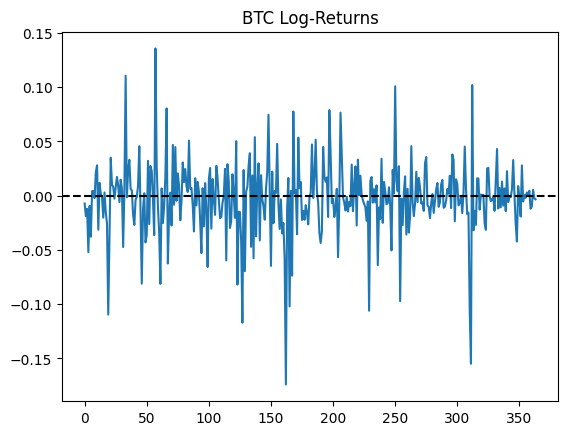

In [28]:
ts = ts["Close"].values
ts_log = np.log(ts)
returns = np.diff(ts_log)

plt.plot(returns)
plt.axhline(y=0, c="black", linestyle="--")
plt.title("BTC Log-Returns")
plt.show()

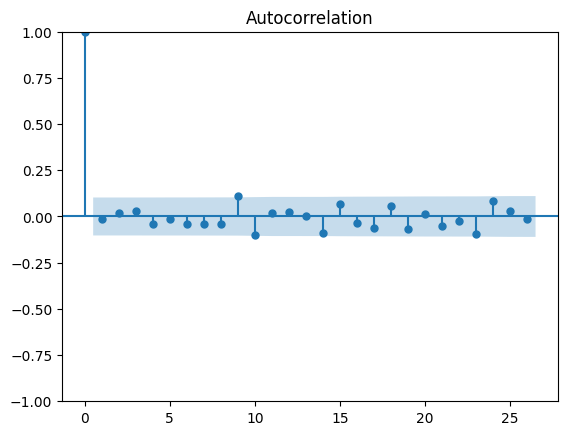

In [29]:
plot_acf(returns)
plt.show()

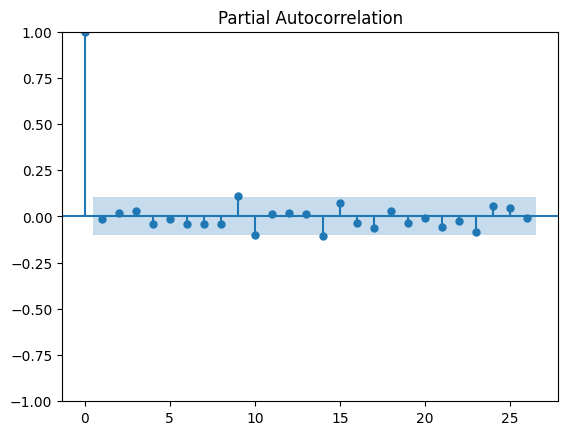

In [6]:
plot_pacf(returns)
plt.show()

In [21]:
unit_test = adfuller(returns)

#Print results
print('ADF Statistic: %f' % unit_test[0])
print('p-value: %f' % unit_test[1])
print('Critical Values:', unit_test[4])

if unit_test[1] <= 0.05:
    print(f'Reject the null hypothesis. The time-series is stationary.')
else: 
    print(f"Fail to reject the null hypothesis. The time-series is non-stationary")

ADF Statistic: -19.230854
p-value: 0.000000
Critical Values: {'1%': np.float64(-3.448493650810824), '5%': np.float64(-2.8695352280356556), '10%': np.float64(-2.5710293341377715)}
Reject the null hypothesis. The time-series is stationary.


In [30]:
train_size = int(len(ts)*0.70)
train, test = returns[:train_size], returns[train_size:]

In [31]:
lowest_bic = None
best_p = None
best_q = None

for p in range(1,6):
    for q in range(1,6):
        #create model
        model=ARIMA(train, order=(p,0,q))
        results = model.fit()

        #select model based on BIC
        bic = results.bic
        print(f"AR({p}), MA({q}), BIC: {bic}")
        if lowest_bic == None:
            lowest_bic = bic
            best_p = p
            best_q = q
        elif bic < lowest_bic:
            lowest_bic = bic
            best_p = p
            best_q = q

print(f"Best ARMA order: ({best_p},0,{best_q})")

AR(1), MA(1), BIC: -948.3172579537322
AR(1), MA(2), BIC: -943.619340924484


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(1), MA(3), BIC: -940.5301460235472
AR(1), MA(4), BIC: -932.9728996062821
AR(1), MA(5), BIC: -927.9219798714757
AR(2), MA(1), BIC: -943.5247962668016
AR(2), MA(2), BIC: -938.1889836470119
AR(2), MA(3), BIC: -932.1275209375387


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(2), MA(4), BIC: -931.1285156500238
AR(2), MA(5), BIC: -923.7533576694716


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(3), MA(1), BIC: -941.7796020449316
AR(3), MA(2), BIC: -933.1068347919828


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(3), MA(3), BIC: -931.6490637754117
AR(3), MA(4), BIC: -921.9732821656902


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR(3), MA(5), BIC: -921.041162777095
AR(4), MA(1), BIC: -933.0795576557824
AR(4), MA(2), BIC: -927.5263147173206


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(4), MA(3), BIC: -922.246083216136


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(4), MA(4), BIC: -917.8154729540054


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(4), MA(5), BIC: -913.964549606394
AR(5), MA(1), BIC: -927.6629226652796
AR(5), MA(2), BIC: -922.0799389348514


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(5), MA(3), BIC: -917.3745479068962


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR(5), MA(4), BIC: -912.3824204048269
AR(5), MA(5), BIC: -908.7659977357354
Best ARMA order: (1,0,1)


e:\Projects\Github\Predicting-Bitcoin-Returns-with-Long-Short-Term-Memory-LSTM-Neural-Networks\lstm-senior-project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
model = ARIMA(train, order=(1,0,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  255
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 485.241
Date:                Wed, 04 Dec 2024   AIC                           -962.482
Time:                        13:46:11   BIC                           -948.317
Sample:                             0   HQIC                          -956.785
                                - 255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.002     -1.386      0.166      -0.008       0.001
ar.L1          0.4568      3.769      0.121      0.904      -6.930       7.844
ma.L1         -0.4462      3.798     -0.117      0.9

In [46]:
fitted = results.fittedvalues

In [47]:
mse = mean_squared_error(train, fitted)
rmse = sqrt(mse)
print(f"Train RMSE: {rmse}")

Train RMSE: 0.036086177591062446


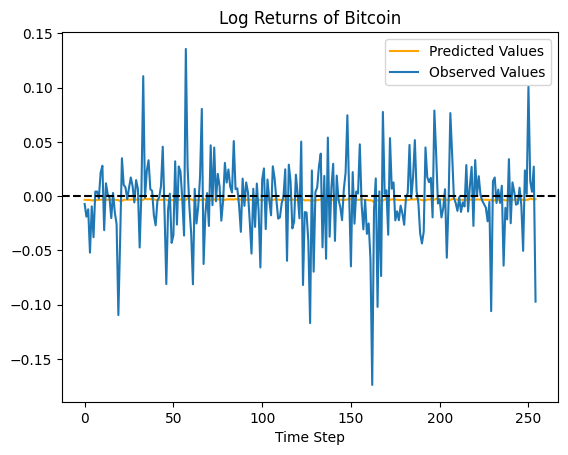

In [48]:
plt.plot(fitted, c='orange', label="Predicted Values")
plt.plot(train, label='Observed Values')
plt.axhline(y=0, c="black", linestyle="--")
plt.xlabel('Time Step')
plt.title('Log Returns of Bitcoin')
plt.legend()
plt.show()

### Residual Diagnostics

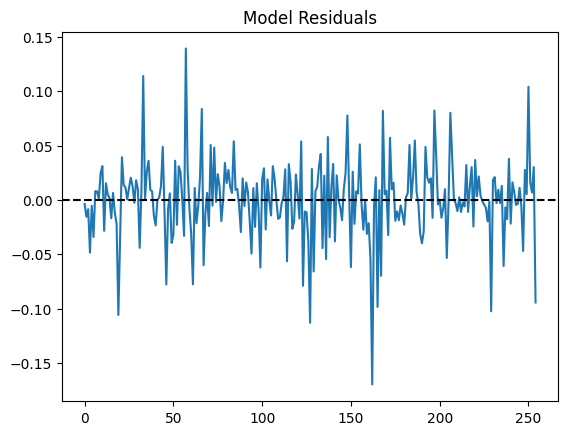

In [34]:
residuals = results.resid
plt.plot(residuals)
plt.axhline(y=0, c="black", linestyle="--")
plt.title("Model Residuals")
plt.show()

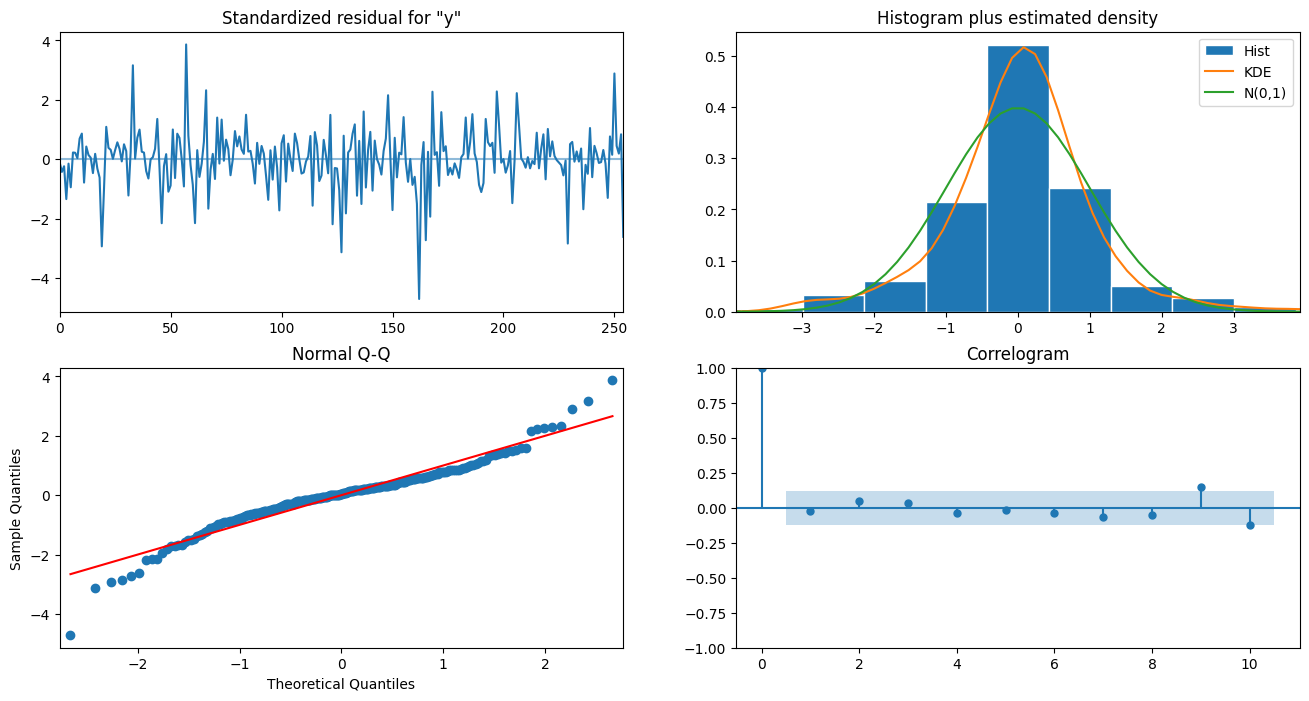

In [35]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [36]:
lagrange_t_stat, p_value, _, _ = acorr_breusch_godfrey(results, nlags=12)
print(f"Results from Breusch-Godfrey Test\nTest-Statistic: {lagrange_t_stat}\nP-Value: {p_value}")

if p_value <= 0.05:
    print(f"Reject the null hypothesis. Presence of serial correlation in the residuals is likely.")
else: 
    print(f"Fail to reject the null hypothesis. Evidence does not suggest serial correlation.")


Results from Breusch-Godfrey Test
Test-Statistic: 14.178548691696692
P-Value: 0.28945214494553956
Fail to reject the null hypothesis. Evidence does not suggest serial correlation.


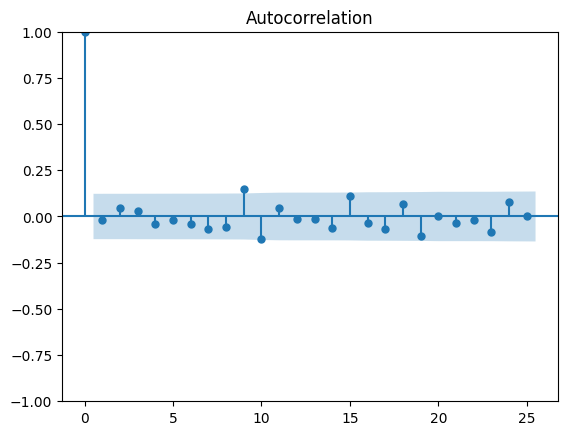

In [37]:
plot_acf(residuals)
plt.show()

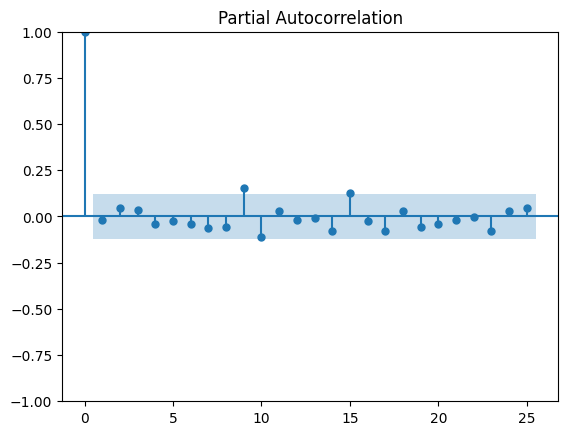

In [38]:
plot_pacf(residuals)
plt.show()

## Model Testing


In [ ]:
def rolling_forecast():

    history = [train]
    predictions = []

    for i in range(len(test+1)):
        model = ARIMA(train, order=(p,0,q))
        results = model.fit()
        
        #One-step-ahead forecast
        y_hat = results.get_forecast(steps=1)
        y_hat_value = y_hat.mean[0]

        #Append history w/ next test value and predictions
        history.append(test[i])
        predictions.append(y_hat_value)
            